# Problem 5.2: Covid-19 tests - data reader

The following is a small program to read the data file "data_Covid19tests.txt", which contains three column: Date (in January 2021), Number of (PCR) tests on that day, and number of positive tests that day.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [80]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import random
from scipy.optimize import curve_fit

In [81]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [82]:
# Read the data and print it to check it:
import numpy as np
date, Ntests, Npositives = np.loadtxt("data_Covid19tests.txt", skiprows=2, unpack=True)

print("Number of entries: ", len(date))
for i in range(len(date)) : 
    print(f"  {date[i]:2.0f}  {Ntests[i]:6.0f}  {Npositives[i]:5.0f}")

Number of entries:  15
   4  103270   2464
   5  102145   1920
   6   93981   1647
   7   83748   1573
   8   73944   1428
   9   51387   1192
  10   47092    989
  11   79306   1340
  12   83126   1238
  13   76080   1112
  14  103694    998
  15   97416    844
  16   75592    719
  17   73613    670
  18  101957    882


In [83]:
D = date
T = Ntests
P = Npositives
SP = np.empty(15)
T_mean = np.mean(T)
print(T_mean)

83090.06666666667


In [84]:
for i in range(0,15):
    SP[i] = P[i] * (T[i]/T_mean)**-0.7 
x = date
y = SP
sy = 123

print(y,sy)

[2116.13394981 1661.62732319 1510.94943673 1564.33941089 1549.46055443
 1668.64267272 1471.69451766 1384.44255949 1237.62536576 1182.76866341
  854.64818975  755.06722035  768.21039657  729.27447933  764.29501428] 123


C:\Users\dell\AppData\Local\Temp/ipykernel_17280/2389163199.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, y,'ro',markersize=5, color='k')


Text(0, 0.5, 'Scaled positives')

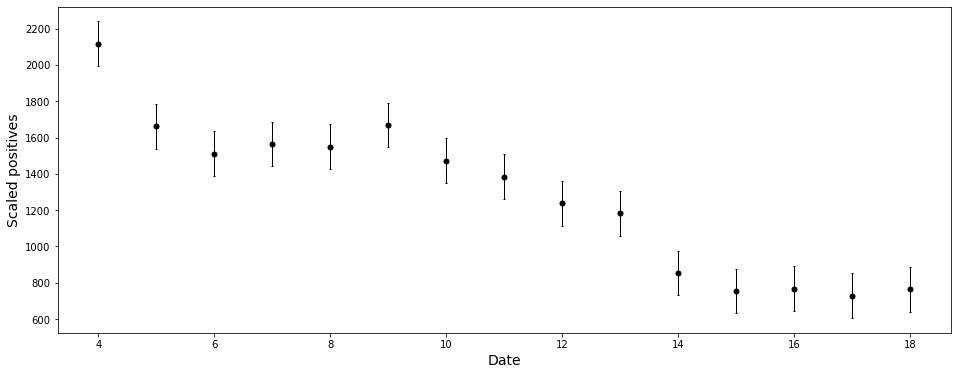

In [85]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(x, y,'ro',markersize=5, color='k')
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='error = relatively 15%', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

plt.xlabel('Date',fontsize=14)
plt.ylabel('Scaled positives',fontsize=14)

In [86]:
def fit_pdf(x,A,R,B):  
    return A*R**((x-B)/4.7)

In [87]:

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(A,R,B) :
    y_fit = fit_pdf(x,A,R,B)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf, x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,A=1.5,R=2,B=19)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


C:\Users\dell\AppData\Local\Temp/ipykernel_17280/192328131.py:2: RuntimeWarning: invalid value encountered in power
  return A*R**((x-B)/4.7)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.78                      │              Nfcn = 363              │
│ EDM = 2e-06 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │    4.2    │    1.4    │            │            │         │         │       │
│ 1 │ R    │   0.723   │   0.011   │            │            │         │         │       │
│ 2 │ B    │    93     │     5     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        A        R        B │
├───┼────────────────────────────┤
│ A │     2.03  0.00673    -4.53 │
│ R │  0.00673 0.000129   0.0237 │
│ B │    -4.53   0.0237     24.2 │
└───┴────────────────────────────┘

In [88]:

# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_A,fit_R,fit_B= minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")


Fit value: A = 4.22868 +/- 1.42525
Fit value: R = 0.72350 +/- 0.01138
Fit value: B = 93.36046 +/- 4.91623
Chi2 value: 20.8   Ndof = 12    Prob(Chi2,Ndof) = 0.054


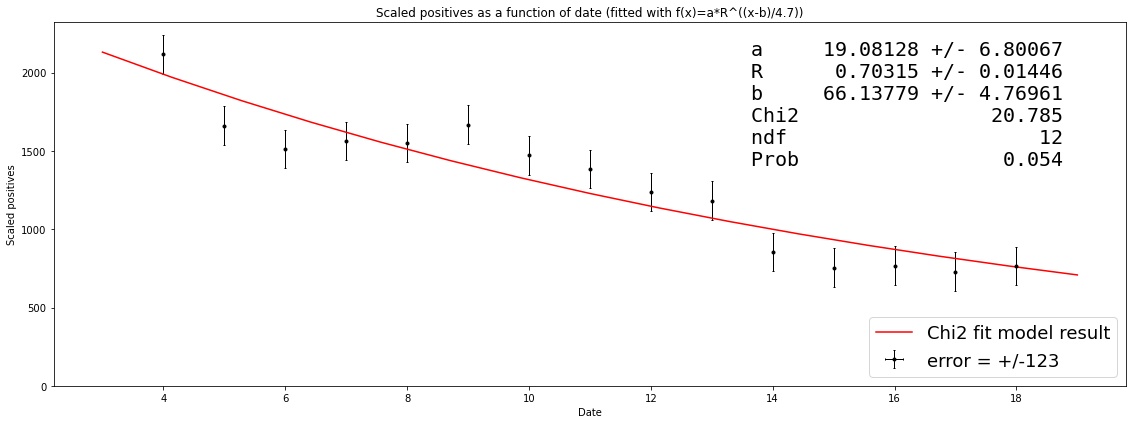

In [89]:

fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='error = +/-123', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="Date", # the label of the y axis
       ylabel="Scaled positives",  # the label of the y axis
       title="Scaled positives as a function of date (fitted with f(x)=a*R^((x-b)/4.7))", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

xmin, xmax = 3,19
# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 15)
ax.plot(x_axis, fit_pdf(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a': "19.08128 +/- 6.80067",
     'R': "0.70315 +/- 0.01446",
     'b': "66.13779 +/- 4.76961",
 #    'sigma':       [minuit_chi2.values['sigma'], minuit_chi2.errors['sigma']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.65, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.

fig.tight_layout()
plt.savefig('covid_fig1',dpi=600)


In [90]:
f1 = 19*0.7**((30-66)/4.7)
print(f1)

291.90175003482597
